Index(['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
              precision    recall  f1-score   support

       False       0.99      0.98      0.98       150
        True       0.73      0.80      0.76        10

    accuracy                           0.97       160
   macro avg       0.86      0.89      0.87       160
weighted avg       0.97      0.97      0.97       160

[[147   3]
 [  2   8]]


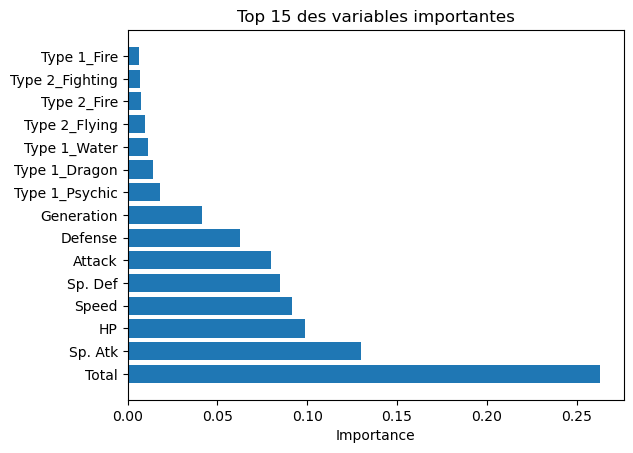

/var/folders/dj/g5h3zxgx0pzdy456xknpmzv40000gn/T/ipykernel_13171/530857300.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([non_leg, leg],


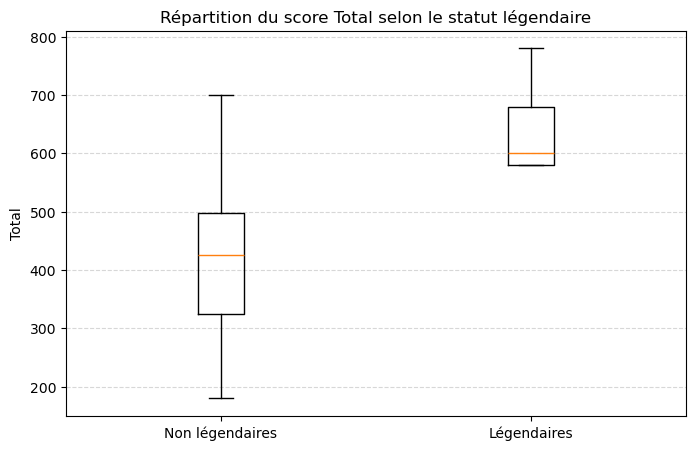

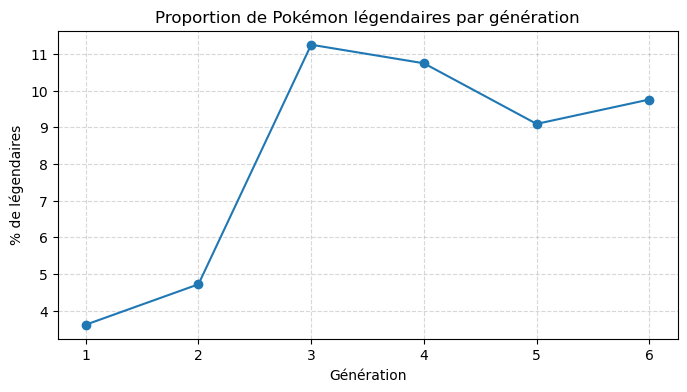

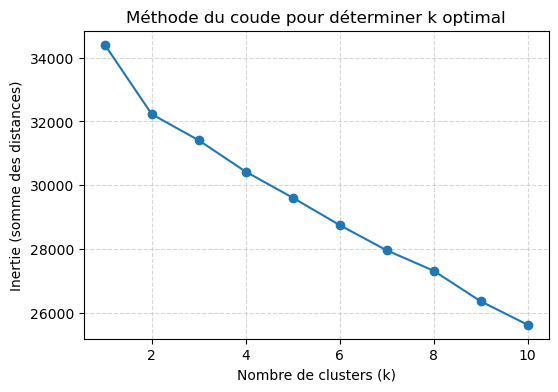

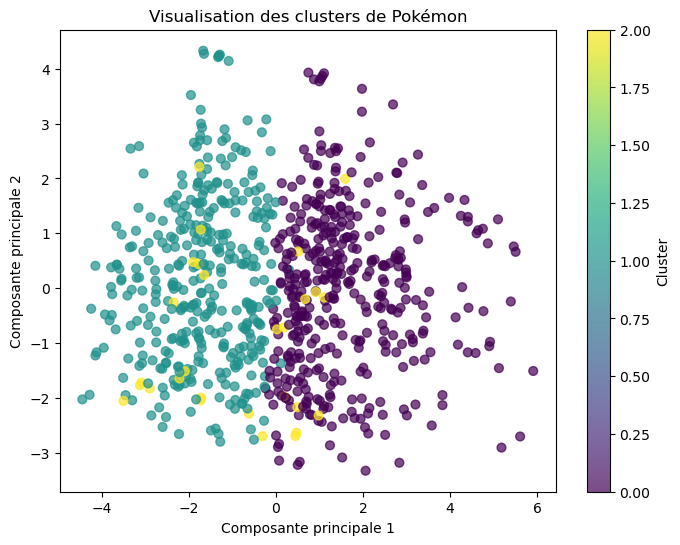


Moyennes des caractéristiques par cluster :
              Total         HP     Attack    Defense    Sp. Atk    Sp. Def  \
Cluster                                                                      
0        531.438424  82.455665  98.039409  89.884236  91.268473  88.448276   
1        330.989071  54.773224  58.213115  56.431694  53.303279  54.122951   
2        399.142857  67.250000  74.678571  68.821429  60.428571  64.392857   

             Speed  
Cluster             
0        81.342365  
1        54.144809  
2        63.571429  

Pourcentage de Pokémon légendaires par cluster :
Cluster
0    16.009852
1     0.000000
2     0.000000
Name: Legendary, dtype: float64


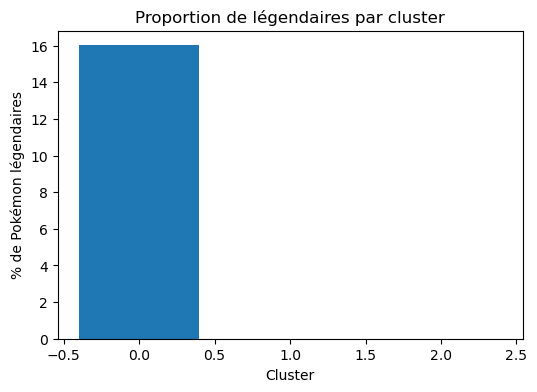

PCA: 25 composantes retenues (95% var).


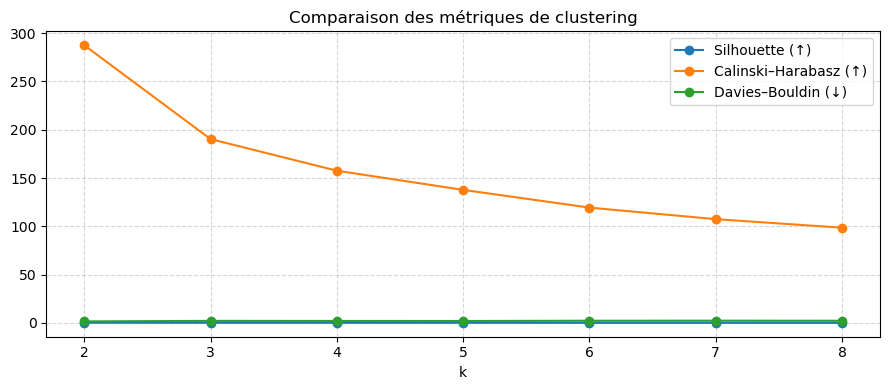

→ k optimal (silhouette): 2 | silhouette=0.226


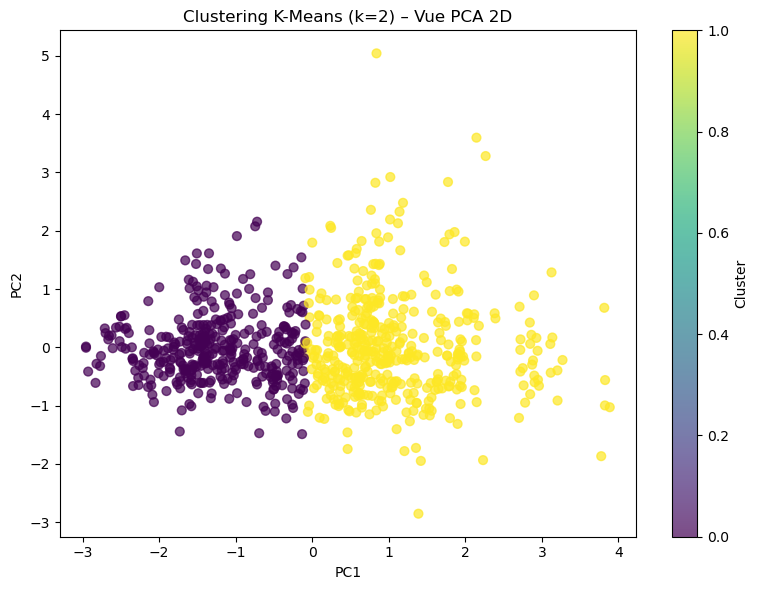


=== Profils par cluster (moyennes) ===
          Total     HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
Cluster                                                         
0        327.82  52.93   58.16    55.83    52.71    53.22  54.98
1        527.88  83.38   97.03    89.42    90.21    88.06  79.78

=== % de Pokémon légendaires par cluster ===
Cluster
0     0.00
1    15.15
Name: Legendary, dtype: float64


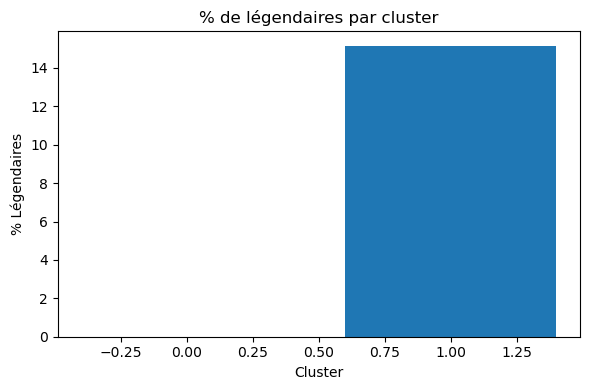

In [12]:
#Projet Pokémon Machine Learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Pokemon.csv")
df = df.drop(columns=['Name', '#'])
print(df.columns)

#Encodage des colonnes "Type"

df = pd.get_dummies(df, columns=['Type 1', 'Type 2'], drop_first=True)

#Séparation des varaibles 

X = df.drop('Legendary', axis=1)
y = df['Legendary']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrainement du modèle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#Visualisations

#Variables les plus importantes

importances = model.feature_importances_
indices = np.argsort(importances)[::-1][:15]

plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Importance')
plt.title('Top 15 des variables importantes')
plt.show()

#Boxplot du score Total selon légendaire / pas légendaire

non_leg = df[df['Legendary'] == False]['Total']
leg = df[df['Legendary'] == True]['Total']

plt.figure(figsize=(8, 5))
plt.boxplot([non_leg, leg],
            labels=['Non légendaires', 'Légendaires'])
plt.ylabel("Total")
plt.title("Répartition du score Total selon le statut légendaire")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

#Calcul du % de légendaires par génération
stats_gen = df.groupby('Generation')['Legendary'].mean() * 100

plt.figure(figsize=(8, 4))
plt.plot(stats_gen.index, stats_gen.values, marker='o')
plt.xlabel("Génération")
plt.ylabel("% de légendaires")
plt.title("Proportion de Pokémon légendaires par génération")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#Clustering

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# 1. Normalisation (important pour K-Means)
df = pd.read_csv("Pokemon.csv")
df = df.drop(columns=['Name'], errors='ignore')
df_encoded = pd.get_dummies(df, columns=['Type 1', 'Type 2'], drop_first=True)
features = df_encoded.drop('Legendary', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


# 2. Choix du nombre de clusters (méthode du coude)

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'o-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (somme des distances)')
plt.title('Méthode du coude pour déterminer k optimal')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#3. Application du K-Means avec k optimal (ex: k=3)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

#4. Visualisation en 2D (PCA)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df['Cluster'], cmap='viridis', s=40, alpha=0.7)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Visualisation des clusters de Pokémon')
plt.colorbar(label='Cluster')
plt.show()

#5. Analyse des clusters

# Moyenne des stats par cluster
cluster_means = df.groupby('Cluster')[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()
print("\nMoyennes des caractéristiques par cluster :")
print(cluster_means)

# Proportion de légendaires dans chaque cluster
legendary_ratio = df.groupby('Cluster')['Legendary'].mean() * 100
print("\nPourcentage de Pokémon légendaires par cluster :")
print(legendary_ratio)

# Visualisation de la proportion de légendaires par cluster
plt.figure(figsize=(6,4))
plt.bar(legendary_ratio.index, legendary_ratio.values)
plt.xlabel("Cluster")
plt.ylabel("% de Pokémon légendaires")
plt.title("Proportion de légendaires par cluster")
plt.show()

# 0) Repart de données propres
df_imp = pd.read_csv("Pokemon.csv").drop(columns=['Name', '#'], errors='ignore')
df_imp_enc = pd.get_dummies(df_imp, columns=['Type 1', 'Type 2'], drop_first=True)

# Retirer la cible 'Legendary' des features (clustering non supervisé)
X_feats = df_imp_enc.drop('Legendary', axis=1) if 'Legendary' in df_imp_enc.columns else df_imp_enc.copy()

# 1) Prétraitement robuste + PCA
scaler = RobustScaler()                      # + robuste que StandardScaler aux outliers
X_scaled = scaler.fit_transform(X_feats)

# PCA pour compacter le bruit et stabiliser K-Means
pca = PCA(n_components=0.95, random_state=42)  # conserve 95% de variance
X_pca = pca.fit_transform(X_scaled)
print(f"PCA: {X_pca.shape[1]} composantes retenues (95% var).")

# 2) Recherche du meilleur k
k_range = range(2, 9)
silh, cali, dbi = [], [], []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=15)
    labels = km.fit_predict(X_pca)
    silh.append(silhouette_score(X_pca, labels))
    cali.append(calinski_harabasz_score(X_pca, labels))
    dbi.append(davies_bouldin_score(X_pca, labels))

# Visualisation des métriques
plt.figure(figsize=(9,4))
plt.plot(k_range, silh, marker='o', label='Silhouette (↑)')
plt.plot(k_range, cali, marker='o', label='Calinski–Harabasz (↑)')
plt.plot(k_range, dbi,  marker='o', label='Davies–Bouldin (↓)')
plt.xlabel("k")
plt.title("Comparaison des métriques de clustering")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# 3) Choix auto du k (max silhouette)
best_k = k_range[int(np.argmax(silh))]
print(f"→ k optimal (silhouette): {best_k:.0f} | silhouette={max(silh):.3f}")

# 4) Fit final et affectation
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=20)
labels_final = kmeans_final.fit_predict(X_pca)

# Ajoute le cluster aux données d’origine (pour les profils lisibles)
df_imp['Cluster'] = labels_final

# 5) Visualisation PCA 2D
pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X_scaled)  # on repart du scaled pour la vue 2D
plt.figure(figsize=(8,6))
sc = plt.scatter(X_2d[:,0], X_2d[:,1], c=df_imp['Cluster'], s=40, alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Clustering K-Means (k={best_k}) – Vue PCA 2D")
cbar = plt.colorbar(sc); cbar.set_label("Cluster")
plt.tight_layout()
plt.show()

# 6) Profiling des clusters
stats_cols = [c for c in ['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'] if c in df_imp.columns]
cluster_means = df_imp.groupby('Cluster')[stats_cols].mean().round(2)
print("\n=== Profils par cluster (moyennes) ===")
print(cluster_means)

if 'Legendary' in df_imp.columns:
    legendary_ratio = (df_imp.groupby('Cluster')['Legendary'].mean()*100).round(2)
    print("\n=== % de Pokémon légendaires par cluster ===")
    print(legendary_ratio)
    plt.figure(figsize=(6,4))
    plt.bar(legendary_ratio.index, legendary_ratio.values)
    plt.xlabel("Cluster"); plt.ylabel("% Légendaires"); plt.title("% de légendaires par cluster")
    plt.tight_layout(); plt.show()
